<a href="https://colab.research.google.com/github/nalinzip/ml_study/blob/main/ML_week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.base import BaseEstimator
import numpy as np
class MyDummyClassifier(BaseEstimator):
    # fit( ) 메서드는 아무것도 학습하지 않음.
    def fit(self, X, y=None):
        pass
    # predict() 메서드는 단순히 Sex 피처가 1 이면 0, 그렇지 않으면 1 로 예측함.
    def predict(self, X):
        pred = np.zeros(( X.shape[0], 1))
        for i in range (X. shape [0]) :
            if X['Sex'].iloc[i] == 1:  # iloc should use the current loop index i
                pred[i] = 0
            else:
                pred[i] = 1
        return pred

In [ ]:
# Feature transformation function
# def transform_features(X):
#     X = X.fillna(X.mean(numeric_only=True))
#     X['Sex'] = X['Sex'].map({'male': 1, 'female': 0})  # convert to numeric
#     return X
# def transform_features(df):
#     df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

#     # Avoid chained assignment warnings
#     df['Age'] = df['Age'].fillna(df['Age'].mean())
#     df['Embarked'] = df['Embarked'].fillna('S')

#     df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})
#     df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

#     return df


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# 원본 데이터를 재로딩 , 데이터 가공 , 학습 데이터 / 테스트 데이터 분할.
titanic_df = pd.read_csv('sample_data/train.csv')
y_titanic_df = titanic_df ['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df,
                                                  test_size=0.2, random_state=0)
# 위에서 생성한 Dummy Classifier를 이용해 학습 / 예측 / 평가 수행.

myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)
mypredictions = myclf.predict(X_test)
print('Dummy Classifier 의 정확도: {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier 의 정확도: 0.7877


In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
class MyFakeClassifier(BaseEstimator):
  def fit(self, X, y):
    pass
  # 입력값으로 들어오는 X 데이터 세트의 크기만큼 모두 0 값으로 만들어서 반환
  def predict(self, X):
    return np.zeros( (len(X), 1), dtype=bool)
# 사이킷런의 내장 데이터 세트인 load_digits( ) 를 이용해 MNIST 데이터 로딩
digits = load_digits()
# digits 번호가 7 번이면 True 이고 이를 astype(int)로 1 로 변환 , 7 번이 아니면 False 이고 0 으로 변환.
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [ ]:
# 불균형한 레이블 데이터 분포도 확인.
print('레이블 테스트 세트 크기 :', y_test.shape)
print('테스트 세트 레이블 0 과 1 의 분포도 ')
print(pd.Series(y_test).value_counts())
# Dummy Classifier로 학습 / 예측 / 정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0 으로 하여도 정확도는 :{:.3f}'.format(accuracy_score(y_test, fakepred)))

레이블 테스트 세트 크기 : (450,)
테스트 세트 레이블 0 과 1 의 분포도 
0    405
1     45
Name: count, dtype: int64
모든 예측을 0 으로 하여도 정확도는 :0.900


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}'.format(accuracy, precision, recall))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# 원본 데이터를 재로딩 , 데이터 가공 , 학습 데이터 / 테스트 데이터 분할.
titanic_df = pd.read_csv('sample_data/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                    test_size=0.20, random_state=11)
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
[[108  10]
 [ 16  45]]
정확도 : 0.8547, 정밀도 : 0.8182, 재현율 : 0.7377


In [ ]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba() 결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3 개만 샘플로 추출 \n:', pred_proba[:3])
# 예측 확률 array 와 예측 결값 array 를 병합 (concatenate)해 예측 확률과 결괏값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측\n', pred_proba_result[:3])

pred_proba() 결과 Shape : (179, 2)
pred_proba array에서 앞 3 개만 샘플로 추출 
: [[0.45977739 0.54022261]
 [0.86676158 0.13323842]
 [0.84922154 0.15077846]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측
 [[0.45977739 0.54022261 1.        ]
 [0.86676158 0.13323842 0.        ]
 [0.84922154 0.15077846 0.        ]]


In [ ]:
from sklearn.preprocessing import Binarizer
X = [[ 1, -1, 2],
    [2, 0, 0],
    [0,1.1, 1.2]]
#X 의 개별 원소들이 threshold 값보다 같거나 작으면 0 을 , 크면 1 을 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [ ]:
from sklearn.preprocessing import Binarizer
# Binarizer 의 threshold 설정값. 분류 결정 임곗값임.
custom_threshold = 0.5
# predict_proba() 반환값의 두 번째 칼럼 , 즉 Positive 클래스 칼럼 하나만 추출해 Binarizer를 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)
binarizer = Binarizer (threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
get_clf_eval(y_test, custom_predict)

오차 행렬
[[108  10]
 [ 16  45]]
정확도 : 0.8547, 정밀도 : 0.8182, 재현율 : 0.7377


In [ ]:
# Binarizer의 threshold 설정값을 0.4로 설정. 즉 분류 결정 임곗값을 0.5 에서 0.4 로 낮춤
custom_threshold = 0.4
pred_proba_1 = pred_proba[:, 1] .reshape(-1, 1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
get_clf_eval(y_test, custom_predict)

오차 행렬
[[96 22]
 [11 50]]
정확도 : 0.8156, 정밀도 : 0.6944, 재현율 : 0.8197


In [ ]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장.
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
  # thresholds list 객체 내의 값을 차례로 iteration 하면서 Evaluation 수행.

  for custom_threshold in thresholds:
    binarizer = Binarizer (threshold=custom_threshold).fit(pred_proba_c1)
    custom_predict = binarizer.transform(pred_proba_c1)
    print('임곗값:', custom_threshold)
    get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds )

임곗값: 0.4
오차 행렬
[[96 22]
 [11 50]]
정확도 : 0.8156, 정밀도 : 0.6944, 재현율 : 0.8197
임곗값: 0.45
오차 행렬
[[105  13]
 [ 14  47]]
정확도 : 0.8492, 정밀도 : 0.7833, 재현율 : 0.7705
임곗값: 0.5
오차 행렬
[[108  10]
 [ 16  45]]
정확도 : 0.8547, 정밀도 : 0.8182, 재현율 : 0.7377
임곗값: 0.55
오차 행렬
[[110   8]
 [ 17  44]]
정확도 : 0.8603, 정밀도 : 0.8462, 재현율 : 0.7213
임곗값: 0.6
오차 행렬
[[113   5]
 [ 18  43]]
정확도 : 0.8715, 정밀도 : 0.8958, 재현율 : 0.7049


In [ ]:
from sklearn.metrics import precision_recall_curve
# 레이블 값이 1 일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]
# 실제값 데이터 세트와 레이블 값이 1 일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 곗값 배열의 Shape:', thresholds.shape)
# 반환된 임계값 배열 로우가 147 건이므로 샘플로 10 건만 추출하되 , 임곗값을 15 Step 으로 추출.
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10 개 :' , thr_index)
print(' 샘플용 10 개의 임곗값 :', np.round(thresholds[thr_index], 2))
# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도 :', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율 :', np.round(recalls[thr_index], 3))

반환된 분류 결정 곗값 배열의 Shape: (164,)
샘플 추출을 위한 임계값 배열의 index 10 개 : [  0  15  30  45  60  75  90 105 120 135 150]
 샘플용 10 개의 임곗값 : [0.02 0.11 0.13 0.15 0.17 0.25 0.34 0.44 0.62 0.75 0.87]
샘플 임계값별 정밀도 : [0.341 0.372 0.399 0.456 0.505 0.598 0.688 0.787 0.913 0.967 1.   ]
샘플 임계값별 재현율 : [1.    1.    0.967 0.934 0.902 0.902 0.869 0.787 0.689 0.475 0.246]


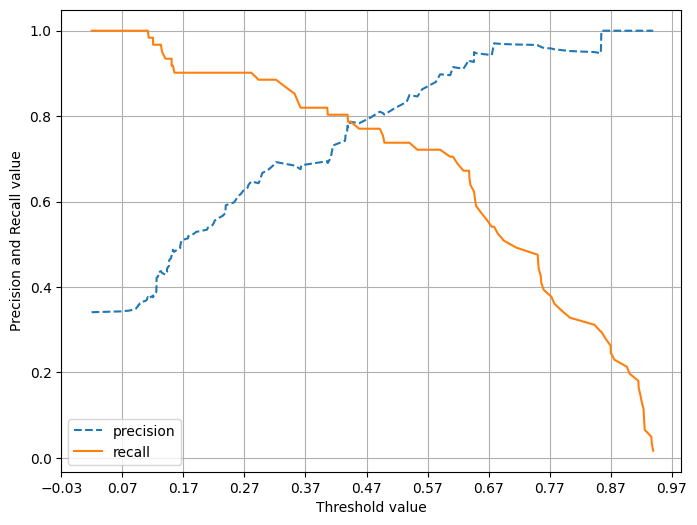

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
def precision_recall_curve_plot(y_test, pred_proba_c1):
# threshold ndarray 와 이 threshold에 따른 정밀도 , 재현율 ndarray 추출.
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
# X 축을 threshold 값으로 , Y 축은 정밀도 , 재현율 값으로 각 Plot 수행. 정밀도는 점선으로 표시
  plt.figure(figsize=(8, 6))
  threshold_boundary = thresholds .shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
  plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
# threshold 값 X 축의 Scale 을 0.1 단위로 변경
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1), 2))
# x 축 , y 축 label 과 legend, 그리고 grid 설정
  plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
  plt.legend(); plt.grid()
  plt.show()
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 스코어 : {0: .4f}'.format(f1))

F1 스코어 :  0.7759


In [ ]:
def get_clf_eval (y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  # F1 스코어 추가
  f1 = f1_score(y_test, pred)
  print('오차 행렬')
  print(confusion)
  #f1 score print 추가
  print('정확도 : {0: .4f}, 정밀도 : {1: .4f}, 재현율 : {2:.4f}, F1:{3:.4f}'
  .format(accuracy, precision, recall, f1))
  print('------------------------------------------------------------')
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값: 0.4
오차 행렬
[[96 22]
 [11 50]]
정확도 :  0.8156, 정밀도 :  0.6944, 재현율 : 0.8197, F1:0.7519
------------------------------------------------------------
임곗값: 0.45
오차 행렬
[[105  13]
 [ 14  47]]
정확도 :  0.8492, 정밀도 :  0.7833, 재현율 : 0.7705, F1:0.7769
------------------------------------------------------------
임곗값: 0.5
오차 행렬
[[108  10]
 [ 16  45]]
정확도 :  0.8547, 정밀도 :  0.8182, 재현율 : 0.7377, F1:0.7759
------------------------------------------------------------
임곗값: 0.55
오차 행렬
[[110   8]
 [ 17  44]]
정확도 :  0.8603, 정밀도 :  0.8462, 재현율 : 0.7213, F1:0.7788
------------------------------------------------------------
임곗값: 0.6
오차 행렬
[[113   5]
 [ 18  43]]
정확도 :  0.8715, 정밀도 :  0.8958, 재현율 : 0.7049, F1:0.7890
------------------------------------------------------------


In [ ]:
from sklearn.metrics import roc_curve
# 레이블 값이 1 일때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]
fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임곗값 배열에서 샘플로 데이터를 추출하되 , 임곗값을 5 Step 으로 추출.
# thresholds [0] 은 max(예측확률)+1 로 임의 설정됨. 이를 제외하기 위해 np.arange 는 1 부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)

print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index 로 추출한 임곗값 :', np. round (thresholds[thr_index], 2))
# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR:', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR:', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46 51]
샘플 index 로 추출한 임곗값 : [0.94 0.68 0.64 0.55 0.44 0.41 0.28 0.15 0.13 0.13 0.11]
샘플 임곗값별 FPR: [0.    0.008 0.025 0.068 0.11  0.186 0.254 0.517 0.644 0.754 0.856]
샘플 임곗값별 TPR: [0.016 0.541 0.672 0.721 0.787 0.803 0.902 0.918 0.967 0.967 0.984]


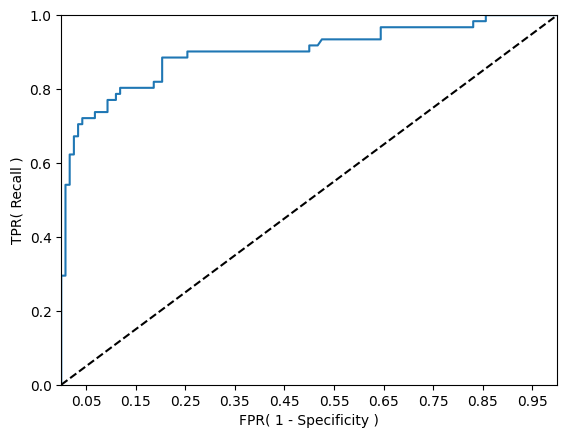

In [ ]:
def roc_curve_plot(y_test, pred_proba_c1):
  # 임곗값에 따른 FPR, TPR 값을 반환받음.
  fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
  # ROC 곡선을 그래프 곡선으로 그림.
  plt.plot(fprs, tprs, label='ROC')
  # 가운데 대각선 직선을 그림.
  plt.plot([0, 1], [0, 1], 'k--', label='Random')
  # FPR X 축의 Scale 을 0.1 단위로 변경 , X, Y 축 명 설정 등
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1), 2))
  plt.xlim(0, 1); plt.ylim(0, 1)
  plt.xlabel('FPR( 1 - Specificity )'); plt.ylabel('TPR( Recall )')
  plt.legend
roc_curve_plot(y_test, pred_proba[:, 1] )

In [ ]:
from sklearn.metrics import roc_auc_score
pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0: .4f}'. format(roc_score))

ROC AUC 값:  0.8995


In [ ]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  # ROC-AUC 추가
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('오차 행렬')
  print (confusion)
  # ROC-AUC print 추가
  print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2: .4f}, \
    F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
diabetes_data = pd.read_csv('sample_data/diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

Outcome
0    500
1    268
Name: count, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [ ]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# 피처 데이터 세트 X, 레이블 데이터 세트 y 를 추출.
# 맨 끝이 outcome 칼럼으로 레이블 값임. 칼럼 위치 1 을 이용해 추출
X = diabetes_data.iloc[:, :-1]
y = diabetes_data. iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify=y)
# 로지스틱 회귀로 학습 , 예측 및 평가 수행.
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[87 13]
 [22 32]]
정확도 : 0.7727, 정밀도 : 0.7111, 재현율 :  0.5926,     F1: 0.6465, AUC: 0.8083


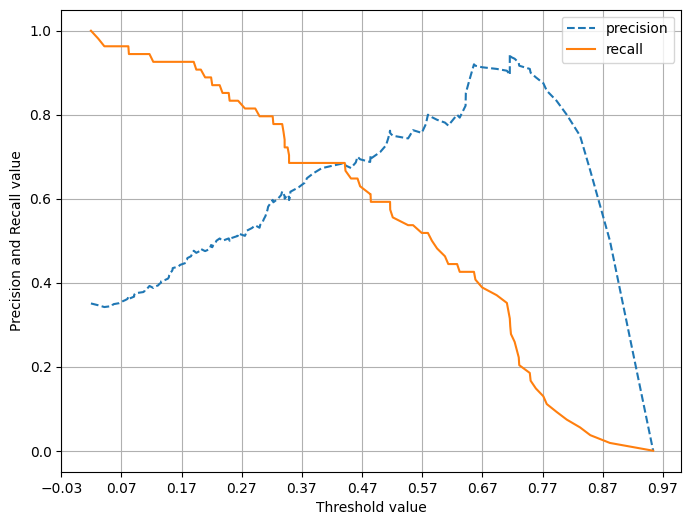

In [ ]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

In [ ]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


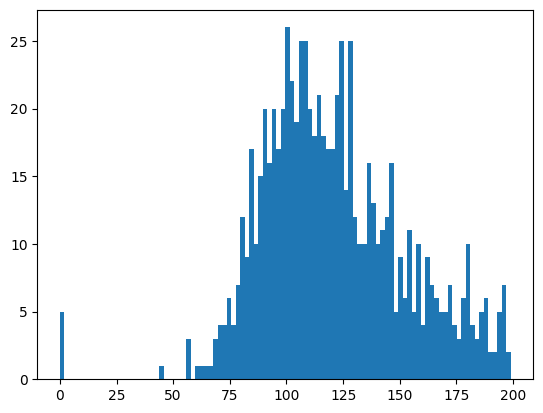

In [ ]:
plt.hist(diabetes_data['Glucose'], bins=100)
plt.show()

In [ ]:
# 0 값을 검사할 피처명 리스트
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
# 전체 데이터 건수
total_count = diabetes_data['Glucose'].count()
# 피처별로 반복하면서 데이터 값이 0 인 데이터 건수를 추출하고 , 퍼센트 계산
for feature in zero_features:
  zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
  print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f}%'.format(feature, zero_count,100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65%
BloodPressure 0 건수는 35, 퍼센트는 4.56%
SkinThickness 0 건수는 227, 퍼센트는 29.56%
Insulin 0 건수는 374, 퍼센트는 48.70%
BMI 0 건수는 11, 퍼센트는 1.43%


In [ ]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0 값을 평균 값으로 대체
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features]=diabetes_data[zero_features].replace(0, mean_zero_features)

In [ ]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]
# Standardscaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler( )
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 156, stratify=y)
# 로지스틱 회귀로 학습 , 예측 및 평가 수행.
lr_clf = LogisticRegression()
lr_clf. fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]
get_clf_eval (y_test, pred, pred_proba)

오차 행렬
[[90 10]
 [21 33]]
정확도 : 0.7987, 정밀도 : 0.7674, 재현율 :  0.6111,     F1: 0.6804, AUC: 0.8433


In [ ]:
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    # thresholds list 객체 내의 값을 차례로 iteration 하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        # Pass pred_proba_c1 to get_clf_eval for ROC AUC calculation
        get_clf_eval(y_test, pred=custom_predict, pred_proba=pred_proba_c1)

In [ ]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds )

임곗값: 0.3
오차 행렬
[[67 33]
 [11 43]]
정확도 : 0.7143, 정밀도 : 0.5658, 재현율 :  0.7963,     F1: 0.6615, AUC: 0.8433
임곗값: 0.33
오차 행렬
[[72 28]
 [12 42]]
정확도 : 0.7403, 정밀도 : 0.6000, 재현율 :  0.7778,     F1: 0.6774, AUC: 0.8433
임곗값: 0.36
오차 행렬
[[76 24]
 [15 39]]
정확도 : 0.7468, 정밀도 : 0.6190, 재현율 :  0.7222,     F1: 0.6667, AUC: 0.8433
임곗값: 0.39
오차 행렬
[[78 22]
 [16 38]]
정확도 : 0.7532, 정밀도 : 0.6333, 재현율 :  0.7037,     F1: 0.6667, AUC: 0.8433
임곗값: 0.42
오차 행렬
[[84 16]
 [18 36]]
정확도 : 0.7792, 정밀도 : 0.6923, 재현율 :  0.6667,     F1: 0.6792, AUC: 0.8433
임곗값: 0.45
오차 행렬
[[85 15]
 [18 36]]
정확도 : 0.7857, 정밀도 : 0.7059, 재현율 :  0.6667,     F1: 0.6857, AUC: 0.8433
임곗값: 0.48
오차 행렬
[[88 12]
 [19 35]]
정확도 : 0.7987, 정밀도 : 0.7447, 재현율 :  0.6481,     F1: 0.6931, AUC: 0.8433
임곗값: 0.5
오차 행렬
[[90 10]
 [21 33]]
정확도 : 0.7987, 정밀도 : 0.7674, 재현율 :  0.6111,     F1: 0.6804, AUC: 0.8433


In [ ]:
# 임곗값을 0.48 로 설정한 Binarizer 생성
binarizer = Binarizer (threshold=0.48)
# 위에서 구한 Ir_clf의 predict_proba() 예측 확률 array 에서 1 에 해당하는 칼럼값을 Binarizer 변환.
pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1, 1))
get_clf_eval(y_test, pred_th_048, pred_proba[:, 1])

오차 행렬
[[88 12]
 [19 35]]
정확도 : 0.7987, 정밀도 : 0.7447, 재현율 :  0.6481,     F1: 0.6931, AUC: 0.8433
